In [1]:
import os
os.listdir('/content')

['.config', 'countries of the world.csv', 'sample_data']

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


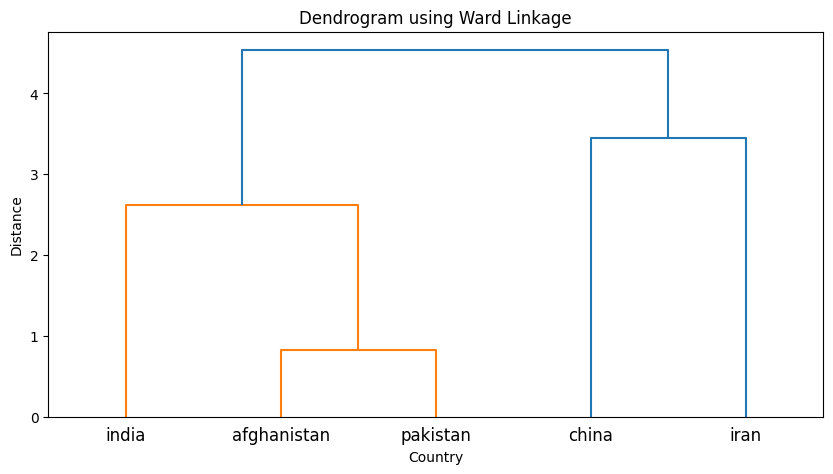

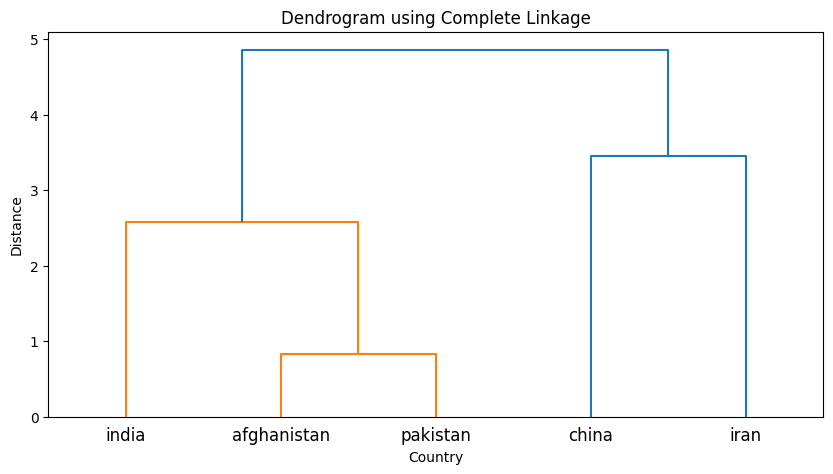

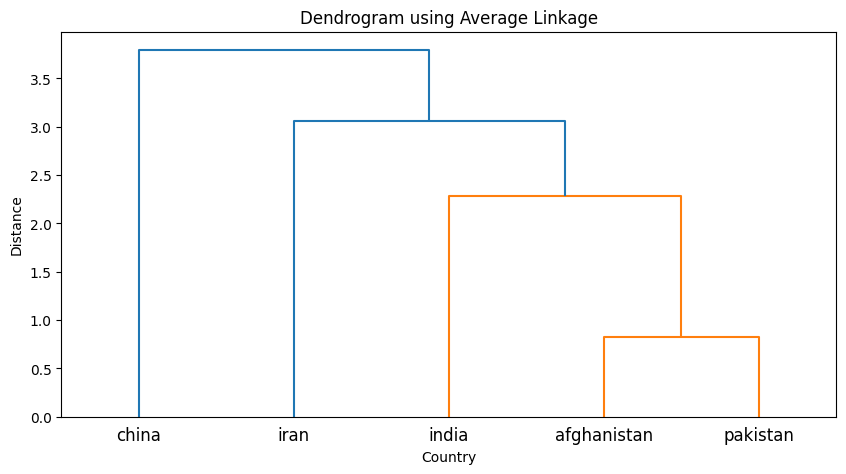

In [23]:
linkage_methods = ['ward', 'complete', 'average']

for method in linkage_methods:
    Z = linkage(scaled_df, method=method)  # scaled_df is your normalized features

    plt.figure(figsize=(10,5))
    dendrogram(Z, labels=scaled_df.index)
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Country')
    plt.ylabel('Distance')
    plt.show()


In [5]:
import pandas as pd

df = pd.read_csv('/content/countries of the world.csv')
df.head()


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [25]:
# -------------------------------
# Q3: Agglomerative Clustering (n=2,3,4)
# -------------------------------

from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Perform clustering
cluster_2 = AgglomerativeClustering(n_clusters=2).fit_predict(scaled_df)
cluster_3 = AgglomerativeClustering(n_clusters=3).fit_predict(scaled_df)
cluster_4 = AgglomerativeClustering(n_clusters=4).fit_predict(scaled_df)

# Print cluster labels
print("Cluster labels (n=2):", cluster_2)
print("Cluster labels (n=3):", cluster_3)
print("Cluster labels (n=4):", cluster_4)

# Create combined cluster table
results = pd.DataFrame({
    'Country': scaled_df.index,
    'Cluster (n=2)': cluster_2,
    'Cluster (n=3)': cluster_3,
    'Cluster (n=4)': cluster_4
})

results


Cluster labels (n=2): [1 0 1 0 1]
Cluster labels (n=3): [0 2 0 1 0]
Cluster labels (n=4): [0 2 3 1 0]


,Country,Cluster (n=2),Cluster (n=3),Cluster (n=4)
0,afghanistan,1,0,0
1,china,0,2,2
2,india,1,0,3
3,iran,0,1,1
4,pakistan,1,0,0


In [6]:
df.columns


Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [8]:
countries = ['Pakistan', 'India', 'China', 'Afghanistan', 'Iran']
filtered_df = df[df['Country'].isin(countries)]
filtered_df


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [10]:
features = filtered_df[['GDP ($ per capita)', 'Population', 'Area (sq. mi.)', 'Literacy (%)']]
features


,GDP ($ per capita),Population,Area (sq. mi.),Literacy (%)


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Columns to use
numeric_cols = ['GDP ($ per capita)', 'Population', 'Area (sq. mi.)', 'Literacy (%)']

# Remove commas, replace with dot, coerce errors to NaN, then convert to float
for col in numeric_cols:
    filtered_df[col] = (
        filtered_df[col]
        .astype(str)                # convert to string
        .str.replace(',', '.', regex=False)  # replace comma with dot
    )
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')  # convert to float, NaN if invalid

# Check for missing values
print(filtered_df[numeric_cols].isna())

# Optionally, drop rows with missing numeric data
filtered_df = filtered_df.dropna(subset=numeric_cols)

# Select cleaned numeric features
features = filtered_df[numeric_cols]
features


     GDP ($ per capita)  Population  Area (sq. mi.)  Literacy (%)
0                 False       False           False         False
42                False       False           False         False
94                False       False           False         False
96                False       False           False         False
156               False       False           False         False


/tmp/ipython-input-3620165183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = (
/tmp/ipython-input-3620165183.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')  # convert to float, NaN if invalid
/tmp/ipython-input-3620165183.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,GDP ($ per capita),Population,Area (sq. mi.),Literacy (%)
0,700.0,31056997,647500,36.0
42,5000.0,1313973713,9596960,90.9
94,2900.0,1095351995,3287590,59.5
96,7000.0,68688433,1648000,79.4
156,2100.0,165803560,803940,45.7


In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(
    scaled_features,
    columns=features.columns,
    index=filtered_df['Country_clean']
)

scaled_df


,GDP ($ per capita),Population,Area (sq. mi.),Literacy (%)
Country_clean,,,,
afghanistan,-1.279020,-0.911405,-0.764526,-1.287774
china,0.657524,1.408926,1.919388,1.400394
india,-0.288230,1.013519,0.027228,-0.137101
iran,1.558242,-0.843343,-0.464480,0.837298
pakistan,-0.648517,-0.667697,-0.717611,-0.812816


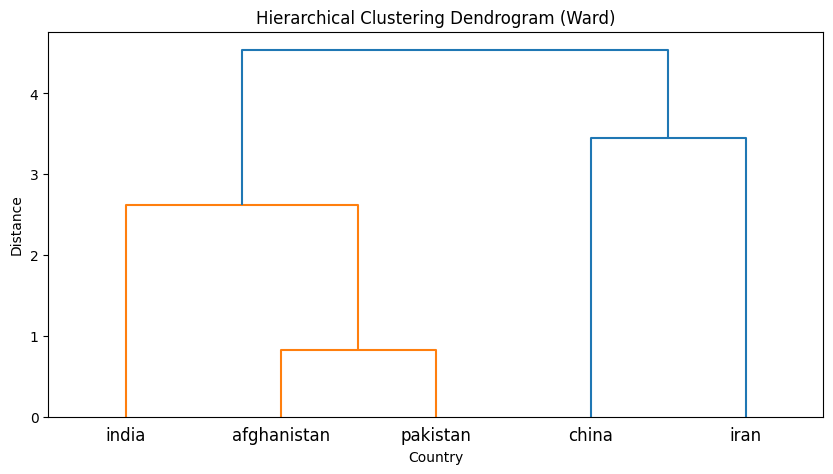

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute linkage using Ward method
linkage_ward = linkage(scaled_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10,5))
dendrogram(linkage_ward, labels=scaled_df.index)
plt.title("Hierarchical Clustering Dendrogram (Ward)")
plt.xlabel("Country")
plt.ylabel("Distance")
plt.show()


In [19]:
from sklearn.cluster import AgglomerativeClustering

# Perform clustering with 3 clusters
cluster_labels = AgglomerativeClustering(n_clusters=3).fit_predict(scaled_df)
cluster_labels


array([0, 2, 0, 1, 0])

In [20]:
# Combine country names and cluster labels
results = pd.DataFrame({
    'Country': scaled_df.index,
    'Cluster': cluster_labels
})

results


,Country,Cluster
0,afghanistan,0
1,china,2
2,india,0
3,iran,1
4,pakistan,0


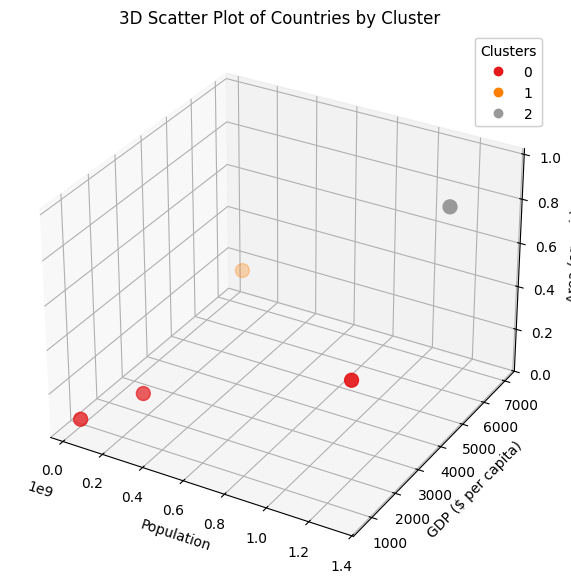

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# Example: Using Population, GDP, Area
x = features['Population']
y = features['GDP ($ per capita)']
z = features['Area (sq. mi.)']

# Use the cluster labels from AgglomerativeClustering (e.g., n_clusters=3)
clusters = cluster_labels  # assuming cluster_labels is already defined

# Create 3D plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points, color by cluster
scatter = ax.scatter(x, y, z, c=clusters, cmap='Set1', s=100)

# Add axis labels
ax.set_xlabel('Population')
ax.set_ylabel('GDP ($ per capita)')
ax.set_zlabel('Area (sq. mi.)')
ax.set_title('3D Scatter Plot of Countries by Cluster')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()
